In [1]:
# Change directory to packages
%cd ../

D:\workspace\github\meditorch


In [2]:
import torch
from torch.utils.data import DataLoader
import numpy as np

from meditorch.datasets import Drishti
from meditorch.nn.segmentation.models.unet import UNet
from meditorch.nn.segmentation.models.unet_attention import UNet_Attention
from meditorch.nn.segmentation.models.unet_nested import UNet_Nested
from meditorch.nn.segmentation.trainer import Trainer
from meditorch.nn.segmentation.utils.plot import plot_image_truemask_predictedmask

seed = 21
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(seed)

In [5]:
weight_decay=0.05
lr=1e-4
patience=5
num_epochs=100

In [6]:
trainset_drishti = Drishti('../data', train=True)
valset_drishti = Drishti('../data', train=False)

batch_size = 16

dataloaders_drishti = {
    'train': DataLoader(trainset_drishti, batch_size=batch_size, shuffle=True, num_workers=0),
    'val': DataLoader(valset_drishti, batch_size=batch_size, shuffle=False, num_workers=0)
}

Extracting data from ../data\Drishti\Drishti-GS1_files\Drishti-GS1_files\Training
Completed extracting `data` and `targets`.
Extracting data from ../data\Drishti\Drishti-GS1_files\Drishti-GS1_files\Test
Completed extracting `data` and `targets`.


Training model, size: 34527106
Epoch 1/100
	learning rate: 1.00e-04
	train-> bce:0.570991|dice:0.917512|iou:0.120614|loss:0.744252
	val  -> bce:0.640816|dice:0.945613|iou:0.000000|loss:0.793214
Epoch 2/100
	learning rate: 1.00e-04
	train-> bce:0.472499|dice:0.884205|iou:0.359622|loss:0.678352
	val  -> bce:0.596259|dice:0.945328|iou:0.000000|loss:0.770794
Epoch 3/100
	learning rate: 1.00e-04
	train-> bce:0.419475|dice:0.869609|iou:0.635940|loss:0.644542
	val  -> bce:0.542946|dice:0.944189|iou:0.000000|loss:0.743568
Epoch 4/100
	learning rate: 1.00e-04
	train-> bce:0.393669|dice:0.863329|iou:0.684802|loss:0.628499
	val  -> bce:0.500946|dice:0.943328|iou:0.000000|loss:0.722137
Epoch 5/100
	learning rate: 1.00e-04
	train-> bce:0.379206|dice:0.856828|iou:0.700524|loss:0.618017
	val  -> bce:0.462650|dice:0.944724|iou:0.000000|loss:0.703687
Epoch 6/100
	learning rate: 1.00e-04
	train-> bce:0.366352|dice:0.852988|iou:0.730588|loss:0.609670
	val  -> bce:0.444154|dice:0.947323|iou:0.000000|loss:

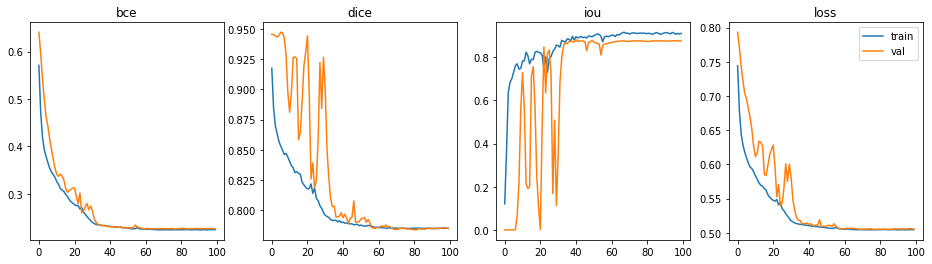

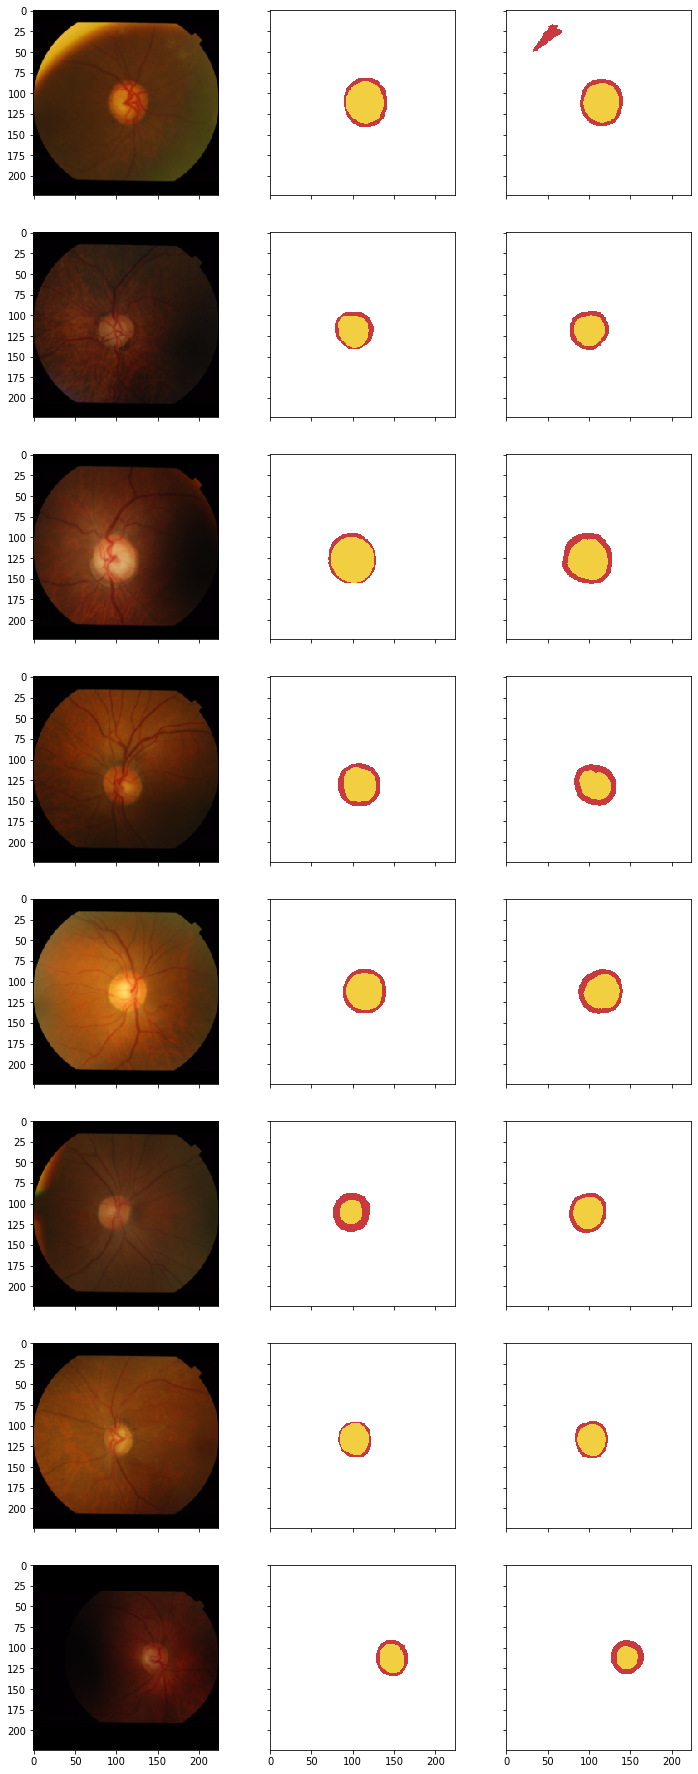

In [7]:
model = UNet(in_ch=3, out_ch=2)

optimizer_func = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_func, patience=patience)

trainer = Trainer(model, optimizer=optimizer_func, scheduler=scheduler, verbose=True)
trainer.train_model(dataloaders_drishti, num_epochs=num_epochs)

images, masks = next(iter(dataloaders_drishti['val']))
preds = trainer.predict(images)
plot_image_truemask_predictedmask(images, masks, preds)


Training model, size: 34878638
Epoch 1/100
	learning rate: 1.00e-04
	train-> bce:0.635522|dice:0.921888|iou:0.076117|loss:0.778705
	val  -> bce:0.659273|dice:0.945733|iou:0.034193|loss:0.802503
	Saving best model, epoch loss 0.802503 < best loss 10000000000.000000
	0m 3s
----------
Epoch 2/100
	learning rate: 1.00e-04
	train-> bce:0.522114|dice:0.889391|iou:0.302858|loss:0.705753
	val  -> bce:0.634123|dice:0.946035|iou:0.000000|loss:0.790079
	Saving best model, epoch loss 0.790079 < best loss 0.802503
	0m 3s
----------
Epoch 3/100
	learning rate: 1.00e-04
	train-> bce:0.463203|dice:0.877785|iou:0.633544|loss:0.670494
	val  -> bce:0.586140|dice:0.946629|iou:0.000000|loss:0.766385
	Saving best model, epoch loss 0.766385 < best loss 0.790079
	0m 3s
----------
Epoch 4/100
	learning rate: 1.00e-04
	train-> bce:0.435009|dice:0.871031|iou:0.679178|loss:0.653020
	val  -> bce:0.535127|dice:0.947019|iou:0.000000|loss:0.741073
	Saving best model, epoch loss 0.741073 < best loss 0.766385
	0m 3s
--

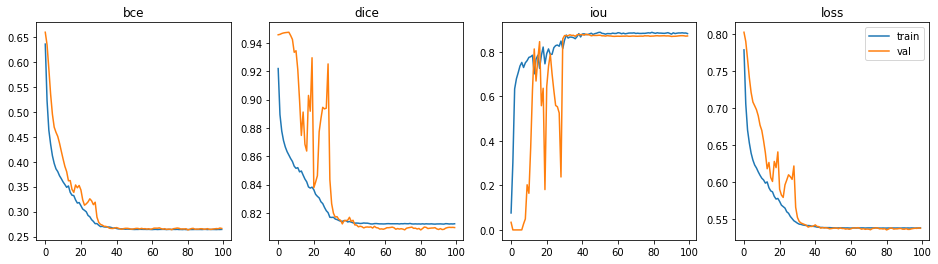

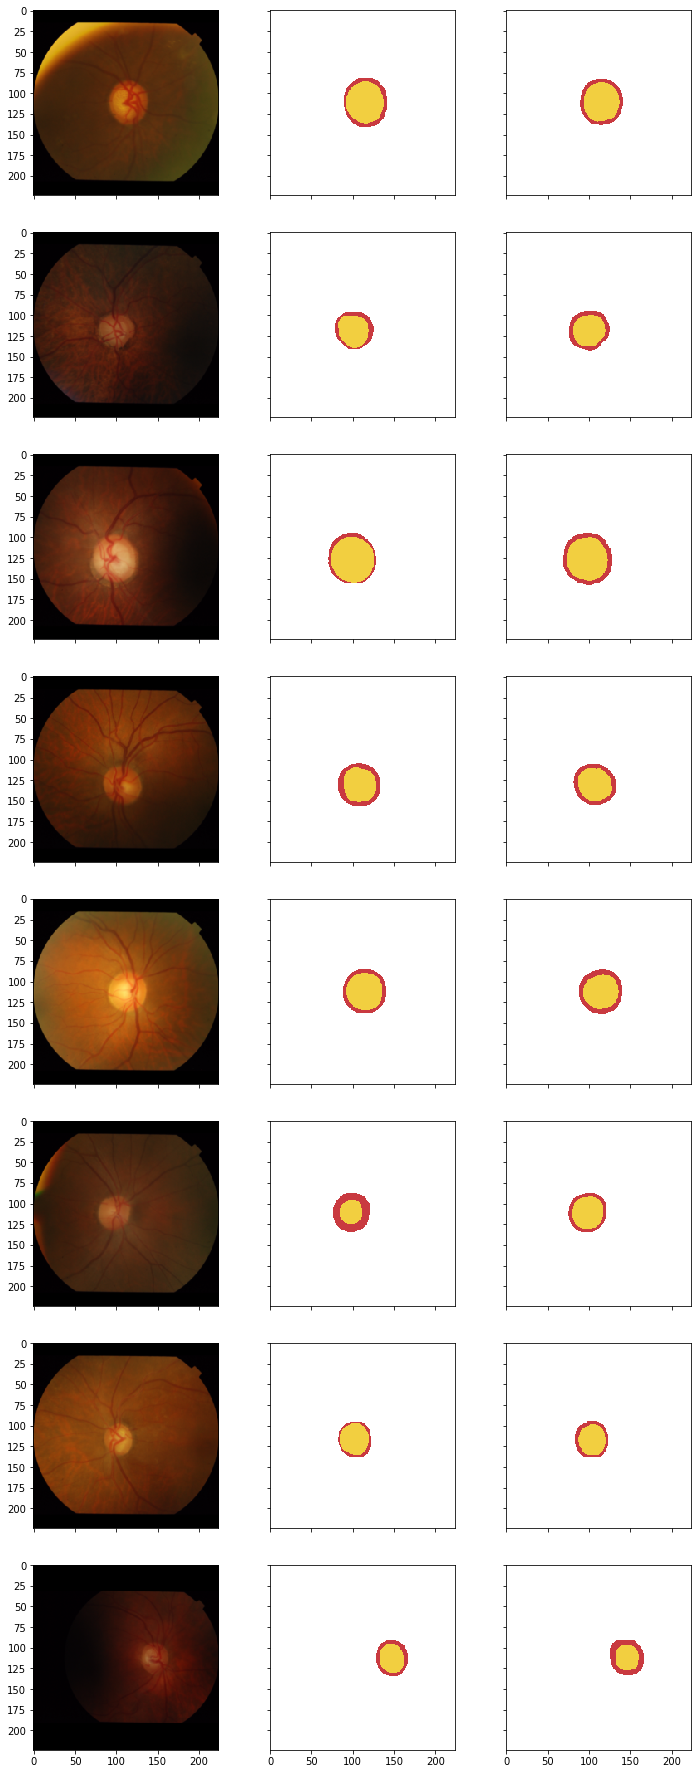

In [6]:
model = UNet_Attention(in_ch=3, out_ch=2)

optimizer_func = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_func, patience=patience)

trainer = Trainer(model, optimizer=optimizer_func, scheduler=scheduler, verbose=True)
trainer.train_model(dataloaders_drishti, num_epochs=num_epochs)

images, masks = next(iter(dataloaders_drishti['val']))
preds = trainer.predict(images)
plot_image_truemask_predictedmask(images, masks, preds)


Training model, size: 36629698
Epoch 1/100
	learning rate: 1.00e-04
	train-> bce:0.568910|dice:0.922450|iou:0.162940|loss:0.745680
	val  -> bce:0.638126|dice:0.945912|iou:0.000000|loss:0.792019
	Saving best model, epoch loss 0.792019 < best loss 10000000000.000000
	0m 6s
----------
Epoch 2/100
	learning rate: 1.00e-04
	train-> bce:0.485365|dice:0.894805|iou:0.411063|loss:0.690085
	val  -> bce:0.601147|dice:0.946149|iou:0.000000|loss:0.773648
	Saving best model, epoch loss 0.773648 < best loss 0.792019
	0m 6s
----------
Epoch 3/100
	learning rate: 1.00e-04
	train-> bce:0.438172|dice:0.879428|iou:0.589526|loss:0.658800
	val  -> bce:0.551308|dice:0.946618|iou:0.000000|loss:0.748963
	Saving best model, epoch loss 0.748963 < best loss 0.773648
	0m 6s
----------
Epoch 4/100
	learning rate: 1.00e-04
	train-> bce:0.414131|dice:0.871486|iou:0.712725|loss:0.642809
	val  -> bce:0.517211|dice:0.947650|iou:0.000000|loss:0.732431
	Saving best model, epoch loss 0.732431 < best loss 0.748963
	0m 6s
--

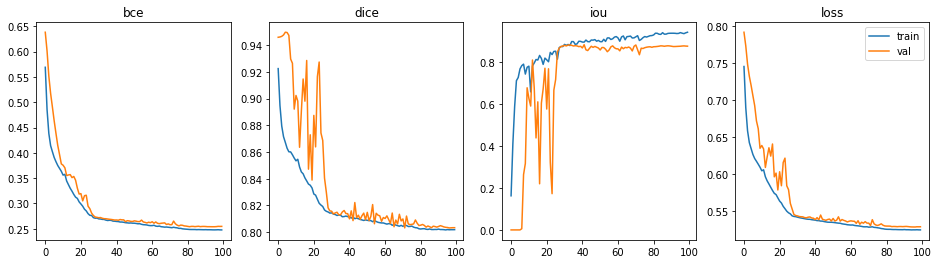

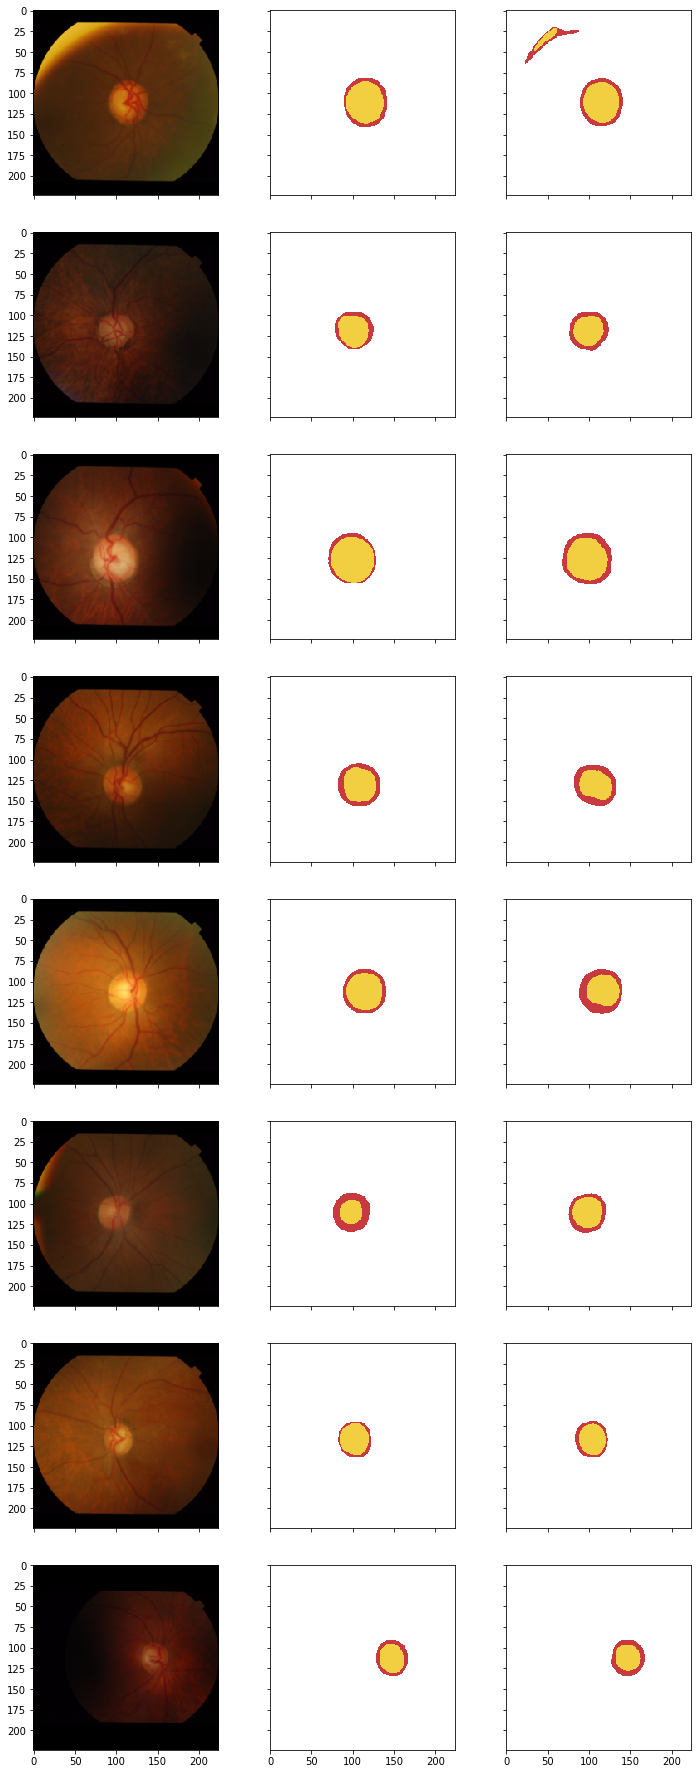

In [7]:
model = UNet_Nested(in_ch=3, out_ch=2)

optimizer_func = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_func, patience=patience)

trainer = Trainer(model, optimizer=optimizer_func, scheduler=scheduler, verbose=True)
trainer.train_model(dataloaders_drishti, num_epochs=num_epochs)

images, masks = next(iter(dataloaders_drishti['val']))
preds = trainer.predict(images)
plot_image_truemask_predictedmask(images, masks, preds)
